# Week 1

# Imports

In [1]:
# %load /Users/bartev/dev/github-bv/sporty/notebooks/imports.py
# %load /Users/bartev/dev/github-bv/sporty/notebooks/imports.py

## Where am I
!echo $VIRTUAL_ENV

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# magics
%load_ext blackcellmagic
# start cell with `%%black` to format using `black`

%load_ext autoreload
# start cell with `%autoreload` to reload module
# https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html

# reload all modules when running
%autoreload 2

/Users/bartev/.venvs/sport


In [2]:
# imports

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

from importlib import reload
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# https://plotnine.readthedocs.io/en/stable/

import plotnine as p9
from plotnine import ggplot, aes, facet_wrap

# Read data

Get the data from https://www.retrosheet.org

In [3]:
pwd

'/Users/bartev/dev/github-bv/sporty/notebooks'

In [4]:
with open('../data/raw/wk1-baseball/retrosheet-gamelog-header.txt', 'r') as f:
    retro_cols = f.read().split(',')

In [5]:
len(retro_cols)

161

In [6]:
MLB = pd.read_csv('../data/raw/wk1-baseball/GL2018.csv', names=retro_cols)
MLB

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,HomeRunsScore,LengthInOuts,DayNight,CompletionInfo,ForfeitInfo,ProtestInfo,ParkID,Attendence,Duration,VisitorLineScore,HomeLineScore,VisitorAB,VisitorH,VisitorD,VisitorT,VisitorHR,VisitorRBI,VisitorSH,VisitorSF,VisitorHBP,VisitorBB,VisitorIBB,VisitorK,VisitorSB,VisitorCS,VisitorGDP,VisitorCI,VisitorLOB,VisitorPitchers,VisitorER,VisitorTER,VisitorWP,VisitorBalks,VisitorPO,VisitorA,VisitorE,VisitorPassed,VisitorDB,VisitorTP,HomeAB,HomeH,HomeD,HomeT,HomeHR,HomeRBI,HomeSH,HomeSF,HomeHBP,HomeBB,HomeIBB,HomeK,HomeSB,HomeCS,HomeGDP,HomeCI,HomeLOB,HomePitchers,HomeER,HomeTER,HomeWP,HomeBalks,HomePO,HomeA,HomeE,HomePassed,HomeDB,HomeTP,UmpireHID,UmpireHName,Umpire1BID,Umpire1BName,Umpire2BID,Umpire2BName,Umpire3BID,Umpire3BName,UmpireLFID,UmpireLFName,UmpireRFID,UmpireRFName,VisitorManagerID,VisitorManagerName,HomeManagerID,HomeManagerName,WinningPitcherID,WinningPitcherName,LosingPitcherID,LosingPitcherNAme,SavingPitcherID,SavingPitcherName,GameWinningRBIID,GameWinningRBIName,VisitorStartingPitcherID,VisitorStartingPitcherName,HomeStartingPitcherID,HomeStartingPitcherName,VisitorBatting1PlayerID,VisitorBatting1Name,VisitorBatting1Position,VisitorBatting2PlayerID,VisitorBatting2Name,VisitorBatting2Position,VisitorBatting3PlayerID,VisitorBatting3Name,VisitorBatting3Position,VisitorBatting4PlayerID,VisitorBatting4Name,VisitorBatting4Position,VisitorBatting5PlayerID,VisitorBatting5Name,VisitorBatting5Position,VisitorBatting6PlayerID,VisitorBatting6Name,VisitorBatting6Position,VisitorBatting7PlayerID,VisitorBatting7Name,VisitorBatting7Position,VisitorBatting8PlayerID,VisitorBatting8Name,VisitorBatting8Position,VisitorBatting9PlayerID,VisitorBatting9Name,VisitorBatting9Position,HomeBatting1PlayerID,HomeBatting1Name,HomeBatting1Position,HomeBatting2PlayerID,HomeBatting2Name,HomeBatting2Position,HomeBatting3PlayerID,HomeBatting3Name,HomeBatting3Position,HomeBatting4PlayerID,HomeBatting4Name,HomeBatting4Position,HomeBatting5PlayerID,HomeBatting5Name,HomeBatting5Position,HomeBatting6PlayerID,HomeBatting6Name,HomeBatting6Position,HomeBatting7PlayerID,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo\n
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,8,51,N,NaN,NaN,NaN,PHO01,48703,216,100001000,30000320x,33,9,0,0,2,2,1,0,0,2,0,12,0,0,2,0,7,5,8,8,0,0,24,8,0,0,0,0,36,12,2,1,0,8,0,0,0,6,0,11,2,0,0,0,10,6,2,2,1,0,27,10,0,0,2,0,cedeg901,Gary Cederstrom,coope901,Eric Cooper,blasc901,Cory Blaser,sches901,Stu Scheurwater,NaN,(none),NaN,(none),blacb001,Buddy Black,lovut001,Tony Lovullo,corbp001,Patrick Corbin,grayj003,Jon Gray,NaN,(none),lambj001,Jake Lamb,grayj003,Jon Gray,corbp001,Patrick Corbin,blacc001,Charlie Blackmon,8,lemad001,DJ LeMahieu,4,arenn001,Nolan Arenado,5,stort001,Trevor Story,6,gonzc001,Carlos Gonzalez,9,desmi001,Ian Desmond,3,parrg001,Gerardo Parra,7,iannc001,Chris Iannetta,2,grayj003,Jon Gray,1,perad001,David Peralta,7,polla001,A.J. Pollock,8,goldp001,Paul Goldschmidt,3,lambj001,Jake Lamb,5,martk001,Ketel Marte,4,avila001,Alex Avila,2,ahmen001,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,8,53,D,NaN,NaN,NaN,ATL03,40208,208,100004000,000002033,31,6,2,0,1,5,0,0,1,6,0,11,1,0,2,0,6,6,7,7,0,0,26,11,1,1,0,0,34,9,1,0,3,7,1,0,1,4,1,6,0,0,0,0,6,6,5,5,1,0,27,9,0,0,2,0,laynj901,Jerry Layne,gibsg901,Greg Gibson,carav901,Vic Carapazza,bakej902,Jordan Baker,NaN,(none),NaN,(none),kaplg001,Gabe Kapler,snitb801,Brian Snitker,vizca001,Arodys Vizcaino,nerih001,Hector Neris,NaN,(none),markn001,Nick Markakis,nolaa001,Aaron Nola,tehej001,Julio Teheran,hernc005,Cesar Hernandez,4,santc002,Carlos Santana,3,willn001,Nick Williams,9,hoskr001,Rhys Hoskins,7,altha001,Aaron Altherr,8,crawj002,J.P. Crawford,6,franm004,Maikel Franco,5,knapa001

In [15]:
MLB18 = (MLB
        [['VisitingTeam', 'HomeTeam', 'VisitorRunsScored','HomeRunsScore', 'Date']]
        .rename(columns={'VisitorRunsScored': 'VisR', 'HomeRunsScore': 'HomeR'}))
MLB18

,VisitingTeam,HomeTeam,VisR,HomeR,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329
...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930
2427,TEX,SEA,1,3,20180930
2428,TOR,TBA,4,9,20180930
2429,MIL,CHN,3,1,20181001


In [16]:
# Assign home/away win

MLB18 = MLB18.assign(
    hwin=lambda x: np.where(x["HomeR"] > x["VisR"], 1, 0),
    awin=lambda x: np.where(x["HomeR"] < x["VisR"], 1, 0),
    count=1,
)

In [17]:
MLB18

,VisitingTeam,HomeTeam,VisR,HomeR,Date,hwin,awin,count
0,COL,ARI,2,8,20180329,1,0,1
1,PHI,ATL,5,8,20180329,1,0,1
2,SFN,LAN,1,0,20180329,0,1,1
3,CHN,MIA,8,4,20180329,0,1,1
4,SLN,NYN,4,9,20180329,1,0,1
...,...,...,...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930,1,0,1
2427,TEX,SEA,1,3,20180930,1,0,1
2428,TOR,TBA,4,9,20180930,1,0,1
2429,MIL,CHN,3,1,20181001,0,1,1


In [18]:
MLBhome = (
    MLB18.groupby("HomeTeam")["hwin", "HomeR", "VisR", "count"]
    .sum()
    .reset_index()
    .rename(
        columns={"HomeTeam": "team", "VisR": "VisRh", "HomeR": "HomeRh", "count": "Gh"}
    )
)
MLBhome

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,team,hwin,HomeRh,VisRh,Gh
0,ANA,42,355,355,81
1,ARI,40,359,328,81
2,ATL,43,391,357,81
3,BAL,28,339,411,81
4,BOS,57,468,322,81
5,CHA,30,321,409,81
6,CHN,51,385,349,82
7,CIN,37,385,418,81
8,CLE,49,443,334,81
9,COL,47,445,404,81


In [19]:
# VisRa = vistiting team runs scored away

MLBaway = (
    MLB18.groupby("VisitingTeam")["awin", "HomeR", "VisR", "count"]
    .sum()
    .reset_index()
    .rename(
        columns={"VisitingTeam": "team", "VisR": "VisRa", "HomeR": "HomeRa", "count": "Ga"}
    )
)
MLBaway

/Users/bartev/.venvs/sport/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,team,awin,HomeRa,VisRa,Ga
0,ANA,38,367,366,81
1,ARI,42,316,334,81
2,ATL,47,300,368,81
3,BAL,19,481,283,81
4,BOS,51,325,408,81
5,CHA,32,439,335,81
6,CHN,44,296,376,81
7,CIN,30,401,311,81
8,CLE,42,314,375,81
9,COL,44,341,335,82


In [25]:
# HomeRh = runs scored as a home team
# VisRh = runs scored by other team when we're home
# HomeRa = runs scored by other team when we're away
# VisRa = runs scored by us when we're away
MLB18 = pd.merge(MLBhome, MLBaway, on='team')
MLB18

,team,hwin,HomeRh,VisRh,Gh,awin,HomeRa,VisRa,Ga
0,ANA,42,355,355,81,38,367,366,81
1,ARI,40,359,328,81,42,316,334,81
2,ATL,43,391,357,81,47,300,368,81
3,BAL,28,339,411,81,19,481,283,81
4,BOS,57,468,322,81,51,325,408,81
5,CHA,30,321,409,81,32,439,335,81
6,CHN,51,385,349,82,44,296,376,81
7,CIN,37,385,418,81,30,401,311,81
8,CLE,49,443,334,81,42,314,375,81
9,COL,47,445,404,81,44,341,335,82


In [26]:
MLB18.columns

Index(['team', 'hwin', 'HomeRh', 'VisRh', 'Gh', 'awin', 'HomeRa', 'VisRa', 'Ga'], dtype='object')

wpc = the win percentage
pyth = the pythagorean expectation

$$
\text{pythagorean expectation} = \frac{\text{runs scored}^2}{\text{runs scored}^2 + \text{runs allowd}^2}
$$

In [35]:
MLB18 = MLB18.assign(
    W=lambda x: x["hwin"] + x["awin"],
    G=lambda x: x["Gh"] + x["Ga"],
    R=lambda x: x["HomeRh"] + x["VisRa"],
    RA=lambda x: x["VisRh"] + x["HomeRa"],
).assign(
    wpc=lambda x: x["W"] / x["G"],
    pyth=lambda x: x["R"] ** 2 / (x["R"] ** 2 + x["RA"] ** 2),
)

# Draw a picture

In [36]:
MLB18.head()

,team,hwin,HomeRh,VisRh,Gh,awin,HomeRa,VisRa,Ga,W,G,R,RA,wpc,pyth
0,ANA,42,355,355,81,38,367,366,81,80,162,721,722,0.494,0.499
1,ARI,40,359,328,81,42,316,334,81,82,162,693,644,0.506,0.537
2,ATL,43,391,357,81,47,300,368,81,90,162,759,657,0.556,0.572
3,BAL,28,339,411,81,19,481,283,81,47,162,622,892,0.290,0.327
4,BOS,57,468,322,81,51,325,408,81,108,162,876,647,0.667,0.647


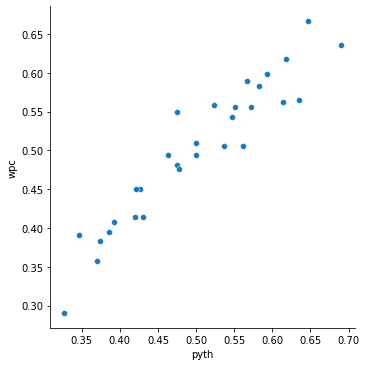

In [64]:
# relplot is a scatterplot
# Illustrates the close correlation between win percentage and pythagorean expectation

sns.relplot(x='pyth', y='wpc', data=MLB18)


# Generate a regression using `statsmodel`

https://www.statsmodels.org/stable/index.html

$$
\text{wpc} = \text{intercept} + \text{coef} \times \text{pyth}
$$

In [58]:
# ols = ordinary least squares
# using R style formulas
python_lm = smf.ols(formula='wpc ~ pyth', data=MLB18).fit()

In [59]:
results = python_lm.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.54e-15
Time:                        00:55:53   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Or, using numpy/pandas

Don't forget to add an intercept column!

In [50]:
import statsmodels.api as sm

In [62]:
results2 = sm.OLS(MLB18['wpc'], MLB18[['pyth']].assign(intercept=1)).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.54e-15
Time:                        00:57:24   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
intercept      0.0609      0.029      2.093      0.046       0.001       0.120
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
type(results)

statsmodels.iolib.summary.Summary

In [44]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.54e-15
Time:                        00:48:00   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(python_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.54e-15
Time:                        00:47:44   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.0

Interpretation

* coef = 0.8770  (slope of the curve)
* t-statistic: coef / std_err
    * Tells us about statistical significance (see p-value)
* P-value (P > t) is the probability that we'd observe the value (0.877) by chance if the true value was 0.
    * By convention, if P-value > 0.05, we are NOT confident that our value is not 0.
* R^2: Tells us the percentage of the variation in `wpc` which can be accounted for by the variation in `pyth`. Here, the pythagorean expectation accounts for 89.4% of the variation in win percentage

In [46]:
.877 / 0.057

15.385964912280702